In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import re 
import pandas as pd
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import csv
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
n_words= set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud,STOPWORDS
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def TwitterClient(): 
    # keys and tokens from the Twitter Dev Console 
    api_key = "xQGrEytN0KSsEERUlbA3Mwjdv"
    api_secret = "N7ModRAyQqtFkB4jvI1o0nCooyfSGfZZUAaIfHTQp3iiUGutKi"
    access = "3118781631-GnQENiXAMouhIuhas2ol14A4b9zyChTR927WZmW"
    access_secret = "frEmYjSFnETQka3sOtTb2x6oCOAkFHDmSivcgrqULytRL"

    # attempt authentication 
    try: 
        # create OAuthHandler object 
        auth = OAuthHandler(api_key, api_secret) 
        # set access token and secret 
        auth.set_access_token(access, access_secret) 
        # create tweepy API object to fetch tweets 
        api = tweepy.API(auth) 
    except: 
        print("Error: Authentication Failed") 

    return api #now we can make request to twitter using this api


In [10]:
def clean(text):
    # removing @ tags and links from the text
    text= ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split()) 

    # converting all letters to lower case and relacing '-' with spaces.
    text= text.lower().replace('-', ' ')

    # removing stowards and numbers
    table= str.maketrans('', '', string.punctuation+string.digits)
    text= text.translate(table)

    # tokenizing words 
    tokens = word_tokenize(text)
    
    # stemming the words 
    stemmed = [porter.stem(word) for word in tokens]
    words = [w for w in stemmed if not w in n_words]

    text = ' '.join(words)
    return text

In [36]:
def get_tweets(query, count = 10): 

    tweets = [] 

    try: 
        # call twitter api to fetch tweets 
        fetched_tweets = api.user_timeline(count= count, screen_name=query, exclude_replies=True, include_rts=False) 
        for tweet in fetched_tweets:
            # cleaning the tweets
            tweet= clean(tweet.text)
            # getting the sentiment from textblob
            analysis = TextBlob(tweet)
            senti= analysis.sentiment.polarity
            # labeling the sentiment
            if senti<0 :
                emotion = "NEG"
            elif senti>0:
                emotion= "POS"
            else:
                emotion= "NEU"
            # appending all data
            tweets.append((tweet, senti, emotion))

        return tweets
    except tweepy.errors.TweepyException as e: 
        # print error (if any) 
        print("Error : " + str(e))

In [41]:
# getting the api access
api = TwitterClient() 
# calling function to get tweets, count is the number of tweets.
tweets = get_tweets(query = "JeffBezos", count = 2000)
df= pd.DataFrame(tweets, columns= ['tweets', 'senti', 'emotion'])
# droping retweets
# df= df.drop_duplicates()

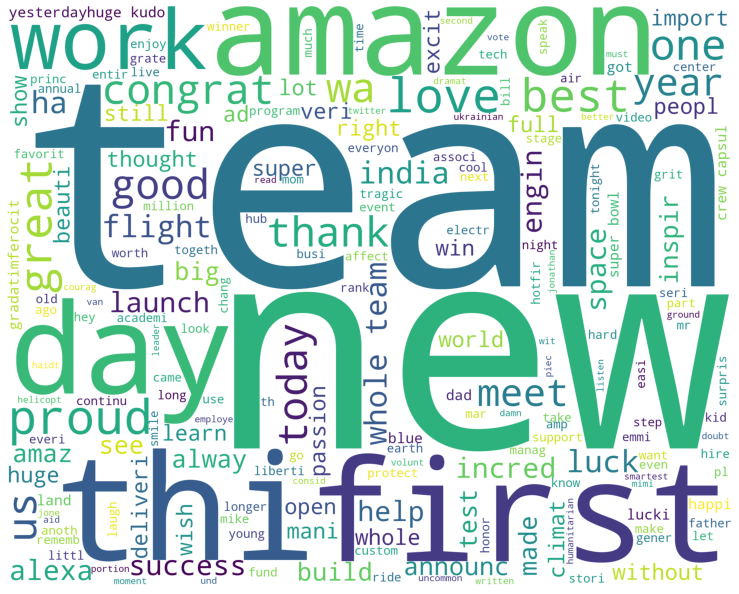

In [45]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                        if not word.startswith('#')
                        and word != 'rt'  
                        ])
    wordcloud = WordCloud(
                        background_color=color,
                        width=2500,
                        height=2000
                        ).generate(cleaned_word)
    # using matplotlib to display the images in notebook itself.
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
df_pos = df[ df['emotion'] == 'POS']
df_pos = df_pos['tweets']
wordcloud_draw(df_pos, 'white')

In [87]:
# print the full tweets with the highest sentiment
df_pos = df[ df['emotion'] == 'POS']
df_pos = df_pos['tweets']
df_pos = df_pos.sort_values(ascending=False)
df_pos = df_pos.head(10)
print(df_pos)


10     ’ open second humanitarian aid hub help ukrain...
90     ’ lucki enough call mom ’ kind patient support...
89     ’ invest billion new air hub get packag faster...
2                                     ’ good use twitter
116    ’ enjoy thi day kid also rememb rememb mani so...
67     yesterday first amazon air plane load relief i...
102    yep ’ wa lucki expos tech code young age inspi...
31     wonder meet tuntiak katan shuar tribe ecuador ...
141    wish best luck tonight marvel mr maisel rachel...
152    winner best news websit big congrat whole team...
Name: tweets, dtype: object
